In [120]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import random

### Picking Fashion MNIST dataset

In [121]:
data = tf.keras.datasets.fashion_mnist
dataset = data.load_data()

### Dividing dataset and visualizing some data

In [122]:
trainSet, testSet = dataset
xTrain, yTrain = trainSet
xTest, yTest = testSet

xTrain, xTest = xTrain / 255.0, xTest / 255.0

labels = ["t_shirt", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle_boot"]

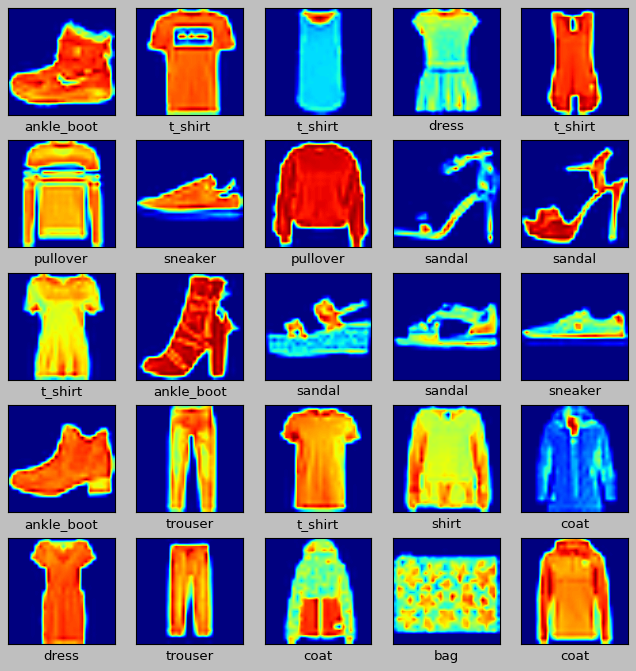

In [123]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(xTrain[i])
    plt.xlabel(labels[yTrain[i]])
#endfor
plt.show()

In [124]:
imageShape = xTrain[0].shape
imageWidth, imageHeight = imageShape

### Creating a CNN model and training

In [125]:
batchSize = 32
nbEpoch = 10
imgChannels = 1 #grayscale
nbFilters = 32
nbPool = 2
nbConv = 5

In [126]:
model = models.Sequential()
model.add(layers.Conv2D(nbFilters, (3, 3), activation='relu', input_shape=(imageWidth, imageHeight, imgChannels)))
model.add(layers.MaxPooling2D((nbPool, nbPool)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((nbPool, nbPool)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(labels)))

print(model.summary())
print(model.get_config())
print(model.layers[0].get_config())
print(model.layers[0].input_shape)           
print(model.layers[0].output_shape)      
print(model.layers[0].get_weights())
np.shape(model.layers[0].get_weights()[0])
print(model.layers[0].trainable)

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
history = model.fit(xTrain, yTrain, verbose=True, batch_size=batchSize, epochs=nbEpoch, validation_data=(xTest, yTest))

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_50 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_77 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_51 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 flatten_24 (Flatten)        (None, 576)             

### Evaluating validation results and plotting graphs

In [127]:
score = model.evaluate(xTest, yTest, verbose=1)
print(score)

313/313 [==============================] - 1s 3ms/step - loss: 0.2742 - accuracy: 0.9100
[0.2742069363594055, 0.9100000262260437]


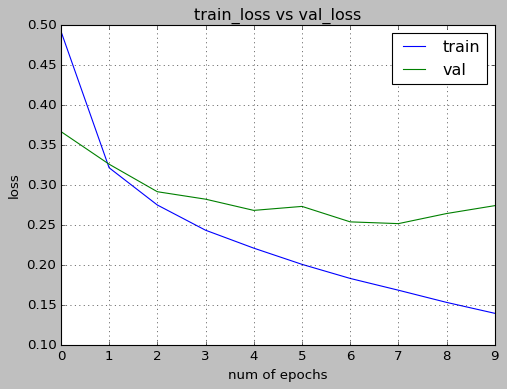

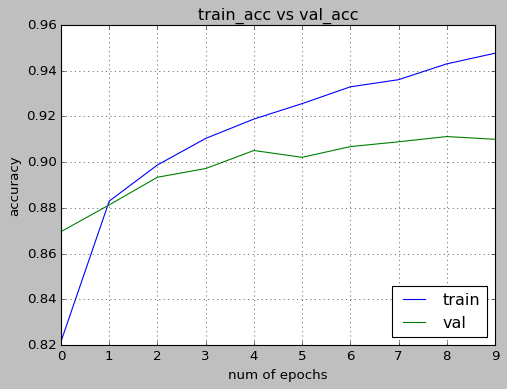

In [128]:
trainLoss = history.history['loss']
valLoss = history.history['val_loss']
trainAcc = history.history['accuracy']
valAcc = history.history['val_accuracy']
xc = range(nbEpoch)

plt.figure(1, figsize=(7,5))
plt.plot(xc, trainLoss)
plt.plot(xc, valLoss)
plt.xlabel('num of epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

plt.figure(2, figsize=(7,5))
plt.plot(xc, trainAcc)
plt.plot(xc, valAcc)
plt.xlabel('num of epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'], loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()

### Testing the model on the test data

In [129]:
testLoss, testAcc = model.evaluate(xTest,  yTest, verbose=2)

313/313 - 1s - loss: 0.2742 - accuracy: 0.9100 - 823ms/epoch - 3ms/step


In [130]:
print(np.argmax(model.predict(xTest), axis=1))
print(yTest)

313/313 [==============================] - 1s 3ms/step
[9 2 1 ... 8 1 5]
[9 2 1 ... 8 1 5]


313/313 [==============================] - 1s 3ms/step
How to read?
Predicted label \ Original label


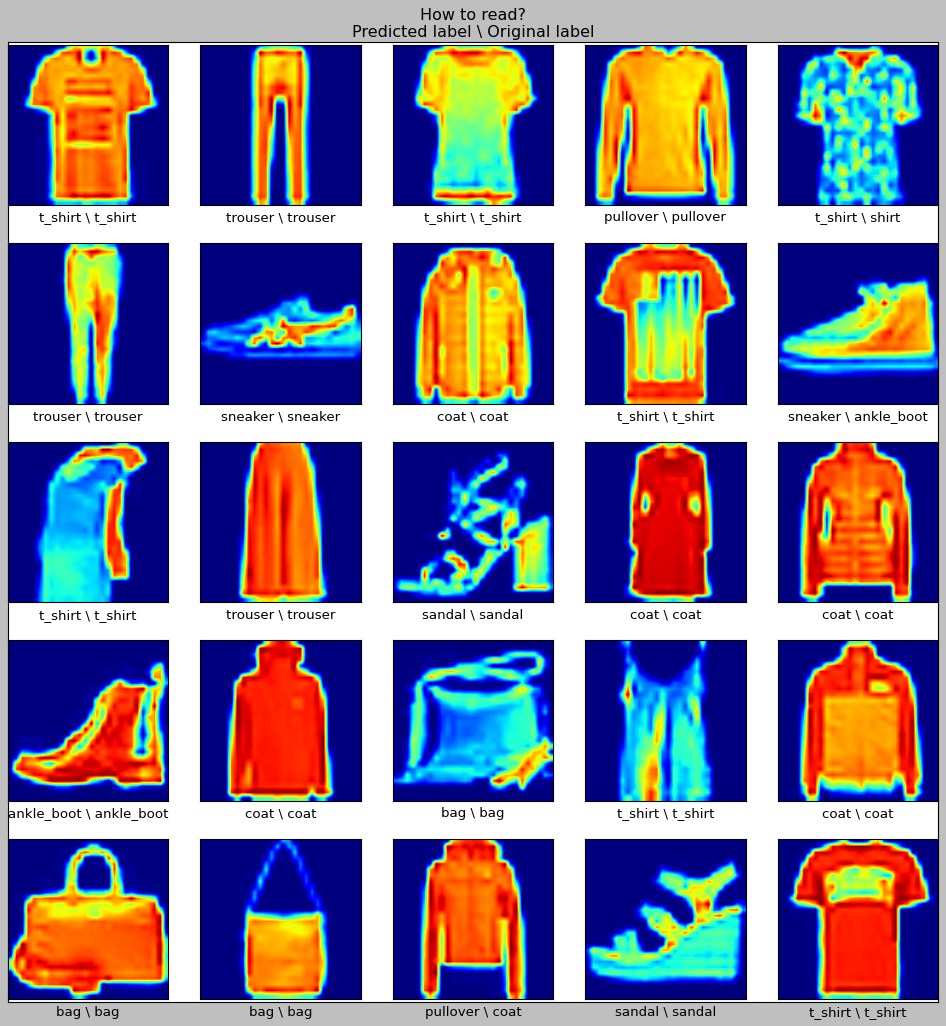

In [147]:
testPred = np.argmax(model.predict(xTest), axis=1)
testDataset = list(zip(xTest, yTest, testPred))

sampleSize = 25
randomTestSamples = random.sample(testDataset, sampleSize)

print("How to read?\nPredicted label \\ Original label")
plt.figure(figsize=(15, 15))
plt.title('How to read?\nPredicted label \\ Original label')
plt.xticks([])
plt.yticks([])
plt.grid(False)
for i in range(sampleSize):
    image, origLabel, predLabel = randomTestSamples[i]
    plt.subplot(math.ceil(sampleSize/5), 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image)
    plt.xlabel(f"{labels[predLabel]} \\ {labels[origLabel]}")
#endfor
plt.show()
